# Loan Default Prediction

## Objective 
The objective of the model is to build a classification model which can predict a loan default. We will be interested in the prediction and understanding what are the major factors results to a default.

## About Data
The dataset is taken from Kaggle.
The dataset consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Loading the data.

In [2]:
# Loading the dataset
data = pd.read_csv('Loan_Default.csv')
data.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [3]:
data.shape

(148670, 34)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
data.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [6]:
data.describe(include='object')

loan_limit  Gender approv_in_adv loan_type loan_purpose  \
count      145326  148670        147762    148670       148536   
unique          2       4             2         3            4   
top            cf    Male         nopre     type1           p3   
freq       135348   42346        124621    113173        55934   

       Credit_Worthiness open_credit business_or_commercial Neg_ammortization  \
count             148670      148670                 148670            148549   
unique                 2           2                      2                 2   
top                   l1        nopc                  nob/c           not_neg   
freq              142344      148114                 127908            133420   

       interest_only  ... construction_type occupancy_type Secured_by  \
count         148670  ...            148670         148670     148670   
unique             2  ...                 2              3          2   
top          not_int  ...                sb             pr       home   
freq          141560  ...            148637         138201     148637   

       total_units credit_type co-applicant_credit_type     age  \
count       148670      148670                   148670  148470   
unique           4           4                        2       7   
top             1U         CIB                      CIB   45-54   
freq        146480       48152                    74392   34720   

       submission_of_application  Region Security_Type  
count                     148470  148670        148670  
unique                         2       4             2  
top                      to_inst   North        direct  
freq                       95814   74722        148637  

[4 rows x 21 columns]

In [7]:
data.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [8]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

### Observations
* Data contains 148670 rows, 34 columns.
* Out of 34, 21 are objects and 13 are numeric.
* 14 columns have missing values.
* We can ignore `ID` and `year` columns. As `ID` is unique to each entry and all the data collected in a single year (2019).
* `Status` will be out target column.
* We will ignore some of features in the cleaning process.

## Target Distribution.
Now lets look at how target variable `Status` is distributed.

In [9]:
count = data['Status'].value_counts()
count

Status
0    112031
1     36639
Name: count, dtype: int64

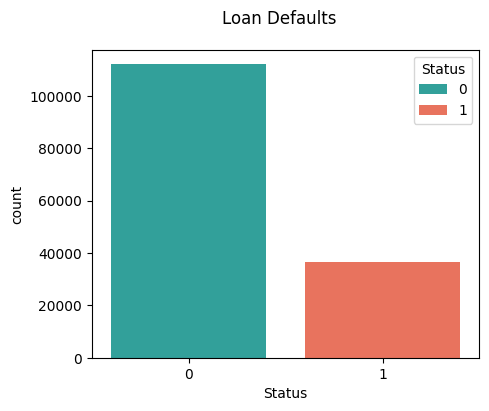

The Default percentage is: 24.645%


In [10]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x='Status', hue = 'Status',  palette=['lightseagreen', 'tomato']) 
plt.suptitle('Loan Defaults')

plt.show()

print(f"The Default percentage is: {(data['Status'].sum()/data.shape[0])*100:.3f}%")

### Observations
* There are about 25% defaults. It will be helpful if a loan default is predicted early.
* The target data is imbalanced which might affect the model predictions.

## Numerical features

In [11]:
num_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
num_cols.remove('ID')
num_cols.remove('year')
num_cols.remove('Status')
num_cols.append('Status')
data[num_cols].head()

loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0       116500               NaN                   NaN              NaN   
1       206500               NaN                   NaN              NaN   
2       406500              4.56                0.2000            595.0   
3       456500              4.25                0.6810              NaN   
4       696500              4.00                0.3042              0.0   

    term  property_value   income  Credit_Score        LTV  dtir1  Status  
0  360.0        118000.0   1740.0           758  98.728814   45.0       1  
1  360.0             NaN   4980.0           552        NaN    NaN       1  
2  360.0        508000.0   9480.0           834  80.019685   46.0       0  
3  360.0        658000.0  11880.0           587  69.376900   42.0       0  
4  360.0        758000.0  10440.0           602  91.886544   39.0       0

`ID` and `year` are not considered.

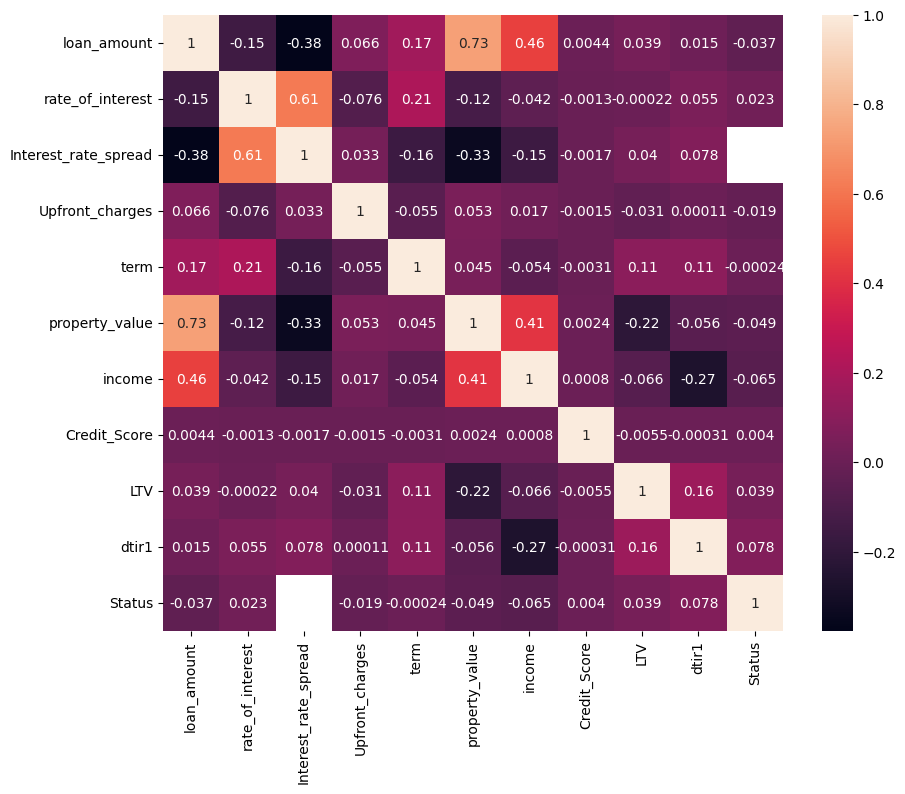

In [12]:
corr_matrix = data[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

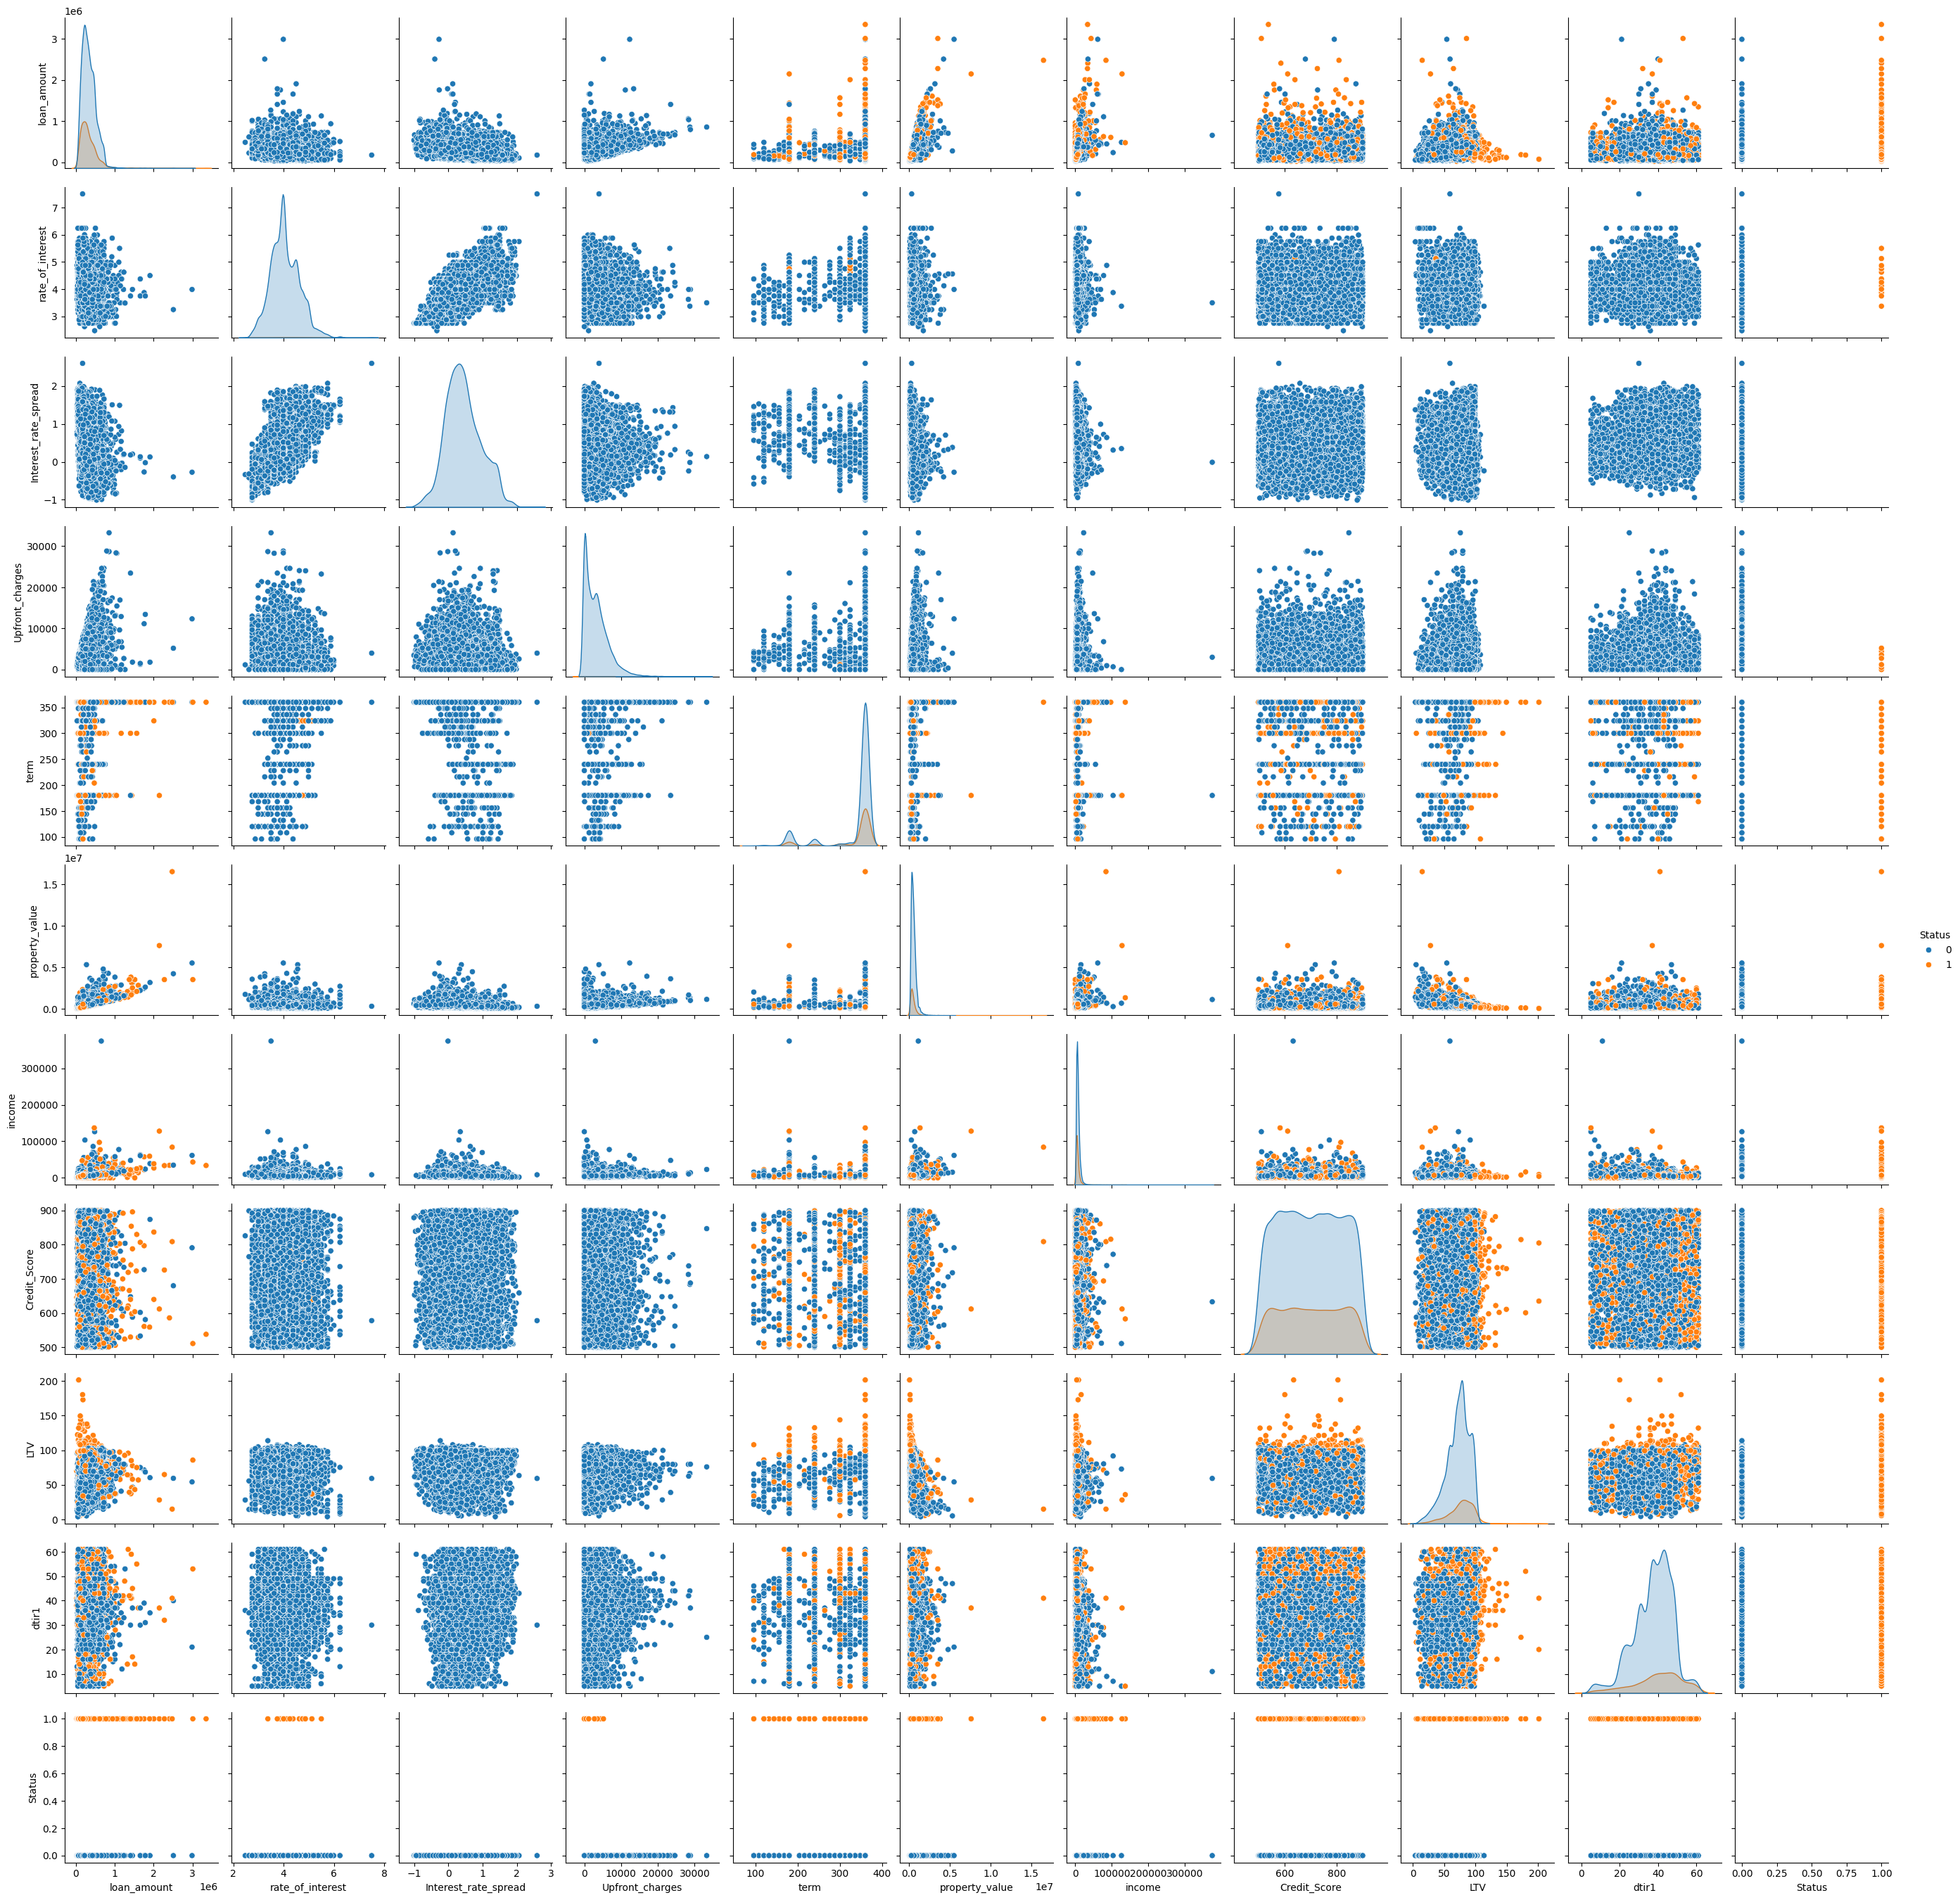

In [13]:
sample_data = data.sample(frac=0.1, random_state=13)
sns.pairplot(sample_data, vars=num_cols, hue='Status', diag_kind='kde', height=2.5)
plt.show()

In [14]:
abs(corr_matrix['Status']).sort_values(ascending=False).head(6)

Status            1.000000
dtir1             0.078083
income            0.065119
property_value    0.048864
LTV               0.038895
loan_amount       0.036825
Name: Status, dtype: float64

### Observations
* We see very little correlation of the features with the targets.
* The top five features correlated to target are
  - `dtir1`
  - `income`
  - `property value`
  - `LTV`
  - `loan_amount`
* `rate_of_interest` and `interest_rate_spread` are correlated.
* `loan_amount`, `property_value` and `income` are correlated.
* From pair plot we see a almost linear relations between target and features.
* Here we select only the above numerical features to train the model.

## Categorical features

In [15]:
cat_cols = [col for col in data.columns if data[col].dtype in ['object', 'category']]

### Relationship Between Categorical Variables and Target.

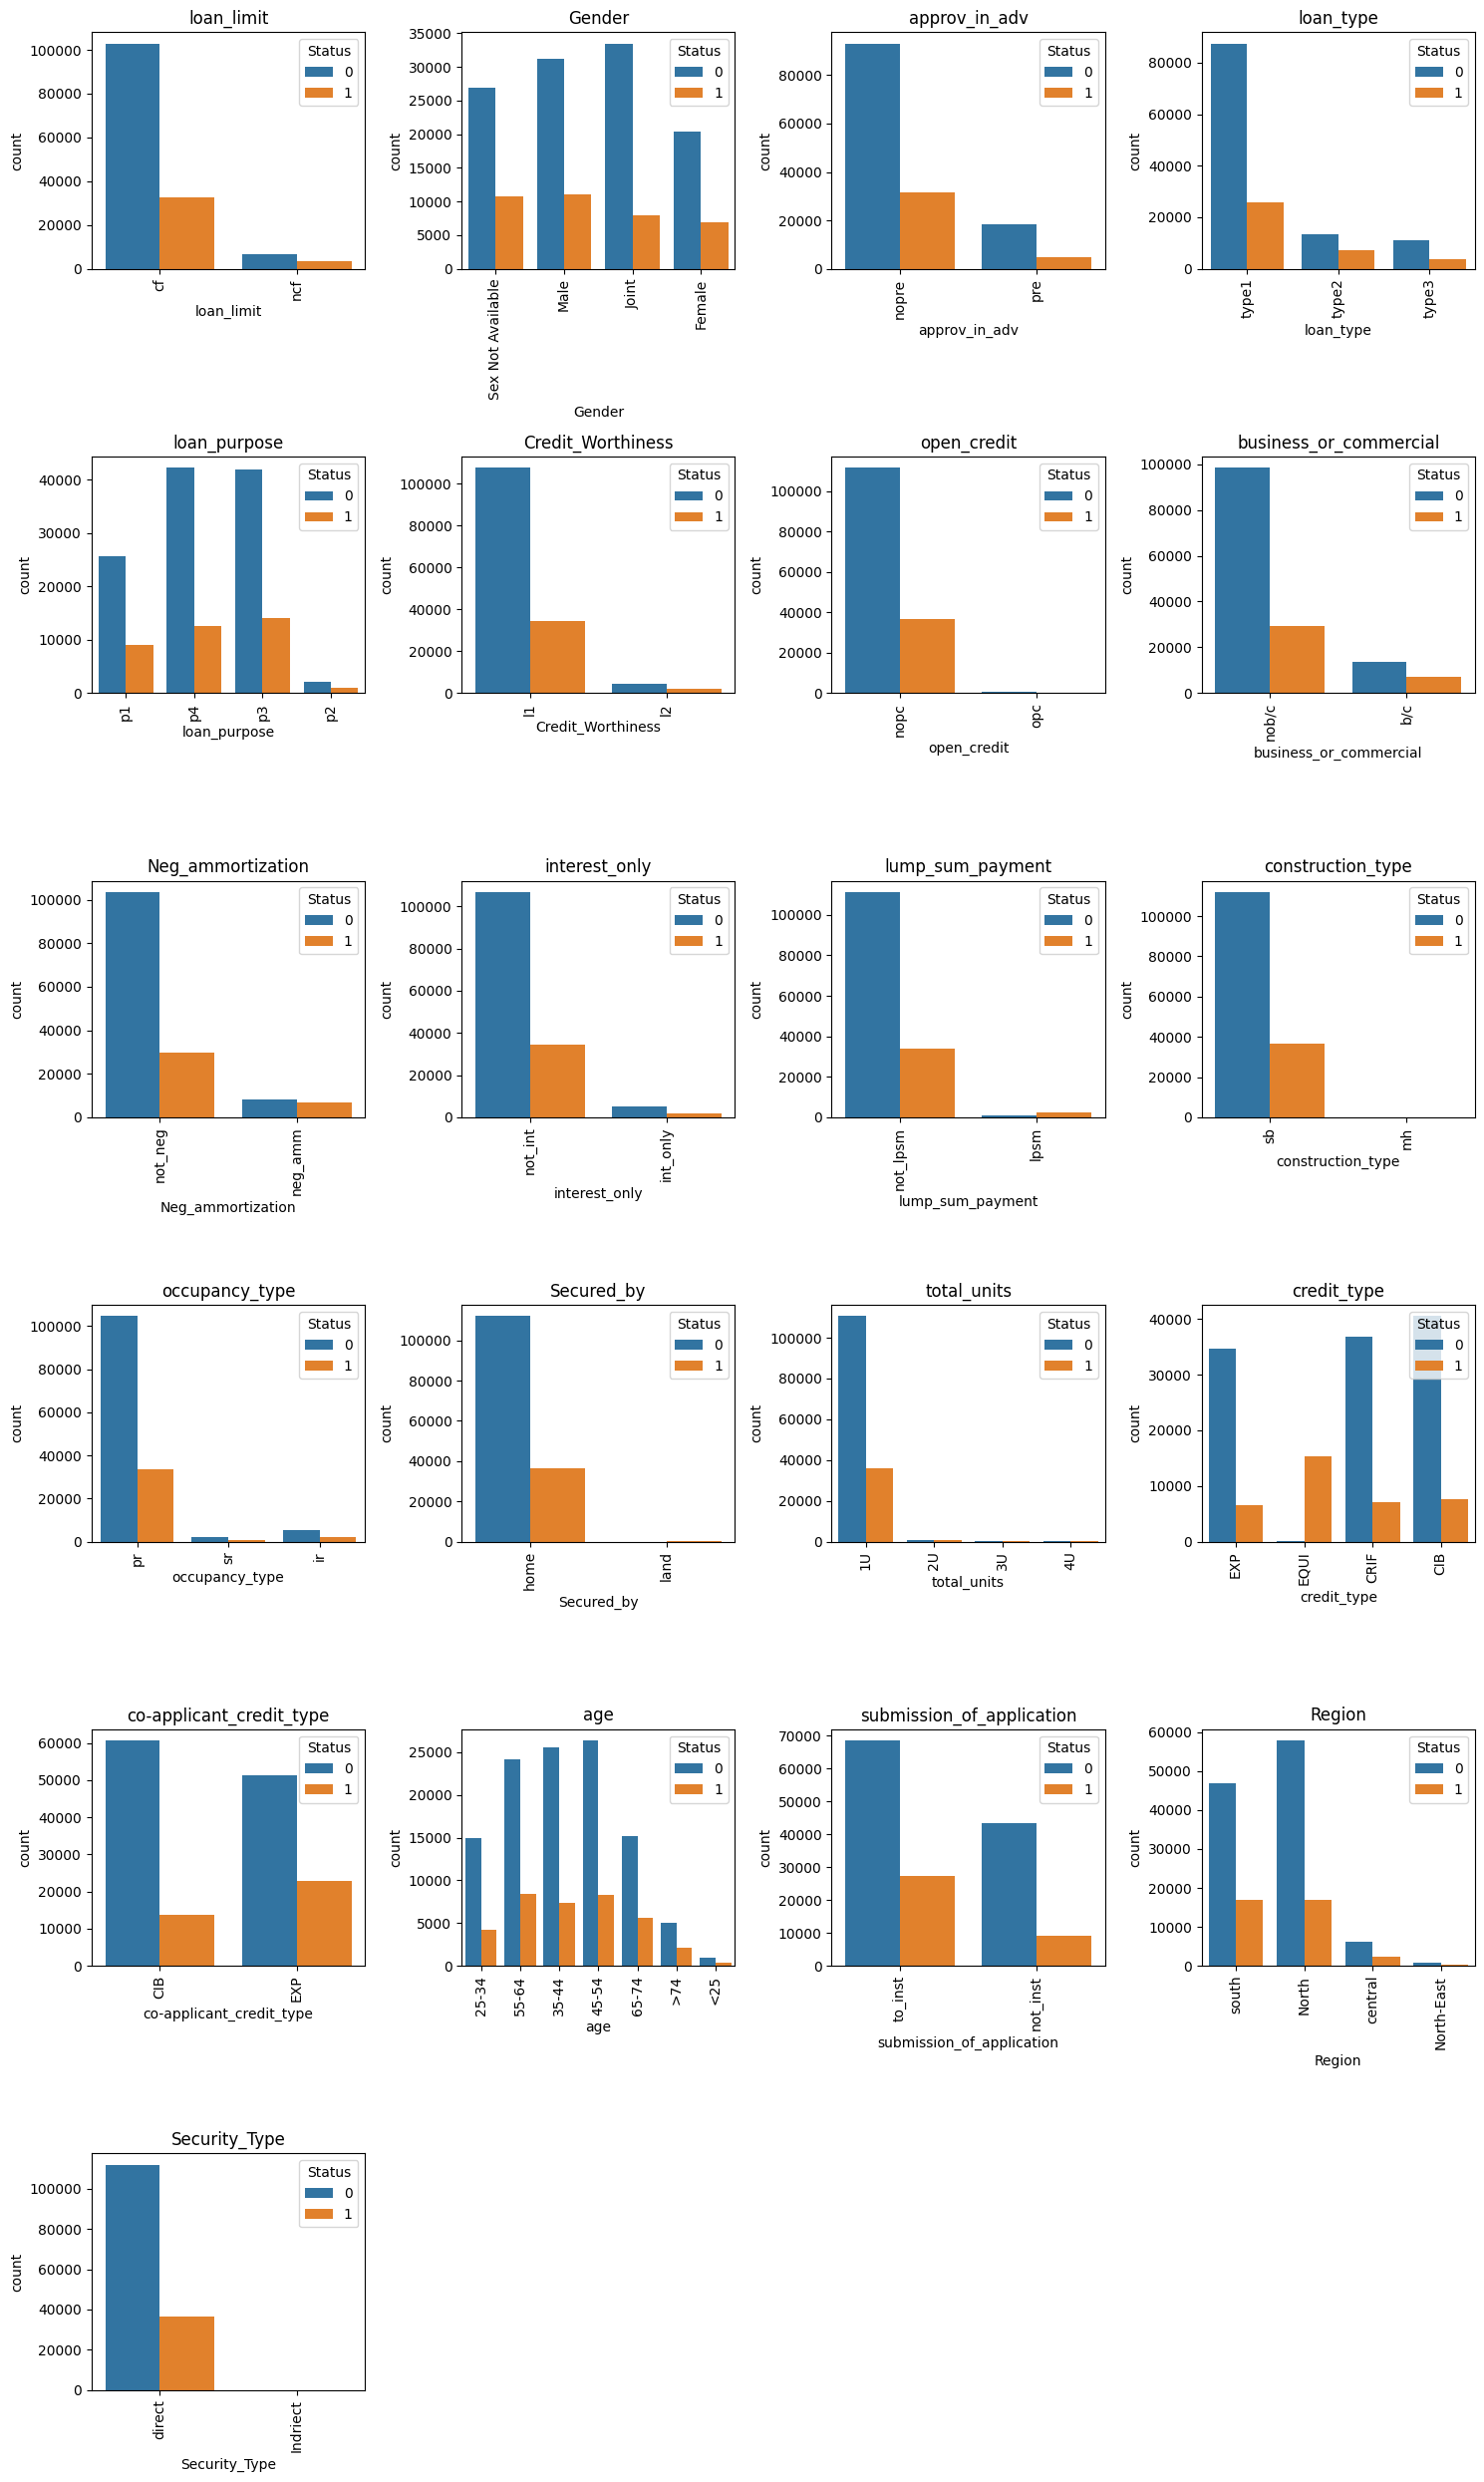

In [16]:
plt.figure(figsize=(15, 25))
for i, col in enumerate(cat_cols, 1):

    plt.subplot(6,4, i)
    sns.countplot(data=data, x=col, hue='Status')
    plt.title(col)
    plt.xticks(rotation=90)
# plt.suptitle("Relationship Between Categorical Variables and Target (Loan Default Status)", y=1)   
plt.tight_layout()
plt.show()

* We can ignore the features: `construction_type`, `Security_Type`,  `open_credit`, `total_units`, `Secured_by` as they have un even categorical distributuions. 
* `submission_of_application`, `age` can also be ignored, since we can argue that they are not much influencing features for default.
* `Gender` is also not included. 

### Selected features
```python
num_features = ['income', 'loan_amount', 'dtir1', 'LTV', 'property_value']
cat_features = ['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose', 
               'Credit_Worthiness', 'business_or_commercial', 'Neg_ammortization',
               'interest_only', 'lump_sum_payment', 'occupancy_type', 'credit_type',
               'co-applicant_credit_type', 'Region']
```

In [17]:
num_features = ['income', 'loan_amount', 'dtir1', 'LTV', 'property_value']
cat_features = ['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose', 
               'Credit_Worthiness', 'business_or_commercial', 'Neg_ammortization',
               'interest_only', 'lump_sum_payment', 'occupancy_type', 'credit_type',
               'co-applicant_credit_type', 'Region']
features = num_features + cat_features

## Handling Missing Values

In [18]:
print(f'Shape of the data: {data.shape}')

Shape of the data: (148670, 34)


In [19]:
print(f'Missing values in Numerical features in percentage:')
data[num_features].isnull().sum().sort_values(ascending=False)*100/data.shape[0]

Missing values in Numerical features in percentage:


dtir1             16.224524
LTV               10.155378
property_value    10.155378
income             6.154571
loan_amount        0.000000
dtype: float64

In [20]:
print(f'Missing values in Categorical features in percentage:')
data[cat_features].isnull().sum().sort_values(ascending=False)*100/data.shape[0]

Missing values in Categorical features in percentage:


loan_limit                  2.249277
approv_in_adv               0.610749
loan_purpose                0.090133
Neg_ammortization           0.081388
loan_type                   0.000000
Credit_Worthiness           0.000000
business_or_commercial      0.000000
interest_only               0.000000
lump_sum_payment            0.000000
occupancy_type              0.000000
credit_type                 0.000000
co-applicant_credit_type    0.000000
Region                      0.000000
dtype: float64

* There are about 16% missing data in `dtir1` and about 10% in both `LTV`, `property_value` and 6% in `income`.
* `loan_limit` has about 2.25% missing data and less than 1% data is missing in `approv_in_adv`, `loan_purpose`, `Neg_ammortization`.
* We will impute the numerical data with median values categorical data with mode or most frequent values.
* For Numerical data we stadardize with standard scalar.
* We one-hot encode the categorical data.
* We create pipelines for these.

## Data Preparation

```python
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
```
Importing the above from sklearn library.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Creating two transformers (pipelines) each one for categorical and numerical columns.
```python
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))])

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
```
Combine these into a column transformer

```python
final_transformer = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)])
```
Now, another pipeline with the `final_transformer` and the desired model like `LogisticRegression` can be easily constructed, trained and evaluated.

In [22]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

final_transformer = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)])

In [23]:
X = data[features].copy()
y = data['Status']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 32)

# Logistic Regression

### Logistic regression with default parameters.
Training the logistic regression model with default parameters. 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score

In [25]:
lr_pipe = Pipeline(steps=[
    ('preprocessing', final_transformer),
    ('classifier', LogisticRegression())
])

lr_pipe.fit(X_train, y_train)

y_pred = lr_pipe.predict(X_test)

y_proba = lr_pipe.predict_proba(X_test)[:, 1]
# Evaluation
print(f"Accuracy: {lr_pipe.score(X_test, y_test)}\n")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba)}")

Accuracy: 0.8611354005515571

Confusion Matrix : 
 [[22156   219]
 [ 3910  3449]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     22375
           1       0.94      0.47      0.63      7359

    accuracy                           0.86     29734
   macro avg       0.90      0.73      0.77     29734
weighted avg       0.87      0.86      0.84     29734

ROC-AUC Score: 0.8257302903524814


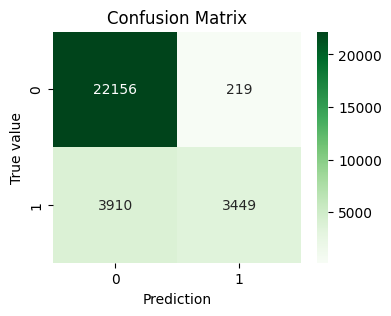

In [26]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.ylabel('True value')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

### Logistic regression: Finding optimal parameters with Crossvalidation.
Here, GridSearchCV is used to find optimal values for 
* Regularization parameter, C
* penalty
* max_iter

f1_score is used for scoring.


In [27]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'classifier__penalty': ['l1', 'l2'], 
    'classifier__C': [1, 10, 100],
    'classifier__max_iter': [100, 250, 400],
    'classifier__solver': ['liblinear', 'saga', 'lbfgs']
}

lr_cv = GridSearchCV(
    estimator=lr_pipe, 
    param_grid=param_grid, 
    scoring='f1', 
    cv=5
)

lr_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['income',
                                                                          'loan_amount',
                                                                          'dtir1',
                                                                          'LTV',
                                                                          'property_value']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(ha...
                                                                          'business_or_commercial',
                                                                          'Neg_ammortization',
                                                                          'interest_only',
                                                                          'lump_sum_payment',
                                                                          'occupancy_type',
                                                                          'credit_type',
                                                                          'co-applicant_credit_type',
                                                                          'Region'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [1, 10, 100],
                         'classifier__max_iter': [100, 250, 400],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='f1')

In [28]:
print("Best Parameters: ", lr_cv.best_params_)
print("Best f1 Score: ", lr_cv.best_score_)

Best Parameters:  {'classifier__C': 100, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best f1 Score:  0.6315075253200881


In [29]:
y_pred = lr_cv.best_estimator_.predict(X_test)
y_prob = lr_cv.best_estimator_.predict_proba(X_test)[:, 1]


# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score: ", roc_auc_score(y_test, y_prob))


Accuracy:  0.861236295150333

Confusion Matrix:
 [[22155   220]
 [ 3906  3453]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     22375
           1       0.94      0.47      0.63      7359

    accuracy                           0.86     29734
   macro avg       0.90      0.73      0.77     29734
weighted avg       0.87      0.86      0.84     29734


ROC-AUC Score:  0.8259000668812029


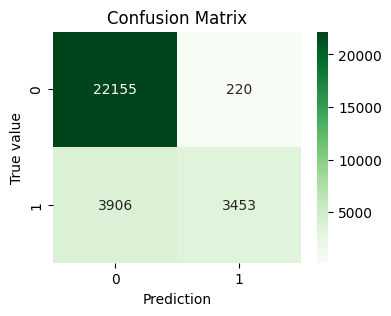

In [30]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.ylabel('True value')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

## Observations.
* The best estimator with the tuned parameters has
  - Regularization strength 100
  - Maximum iteration 100
  - penalty 'l2'
  - and solver 'lbfgs'
* The best estimator from the GridSerachCV did not perform any differnt way than the model with default parameters.
* This model has high precison and low recall. That is when the model predicts the loan will default, it is about 94% of the times correct. But also from low recall of 47%, the model captures about 47% of the actual defaults.

# Random Forests
Now, I train a Random forest model and compare the model performance with the Logistic regression. We also tune the hyperparameters using GridSerachCV.

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [44]:
rf = RandomForestClassifier(class_weight='balanced', 
                            n_estimators=100, 
                            min_samples_split = 2, 
                            max_depth = 10, 
                            random_state=32
                           )

rf_pipe = Pipeline(steps=[
    ('preprocessor', final_transformer),
    ('classifier', rf)
])

rf_pipe.fit(X_train, y_train)

# Prediction
y_pred = rf_pipe.predict(X_test)
y_proba = lr_pipe.predict_proba(X_test)[:, 1]

# Evaluation
print(f"Accuracy: {rf_pipe.score(X_test, y_test)}\n")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba)}")

Accuracy: 0.8698795991121275

Confusion Matrix : 
 [[21024  1351]
 [ 2518  4841]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     22375
           1       0.78      0.66      0.71      7359

    accuracy                           0.87     29734
   macro avg       0.84      0.80      0.82     29734
weighted avg       0.87      0.87      0.87     29734

ROC-AUC Score: 0.8257302903524814


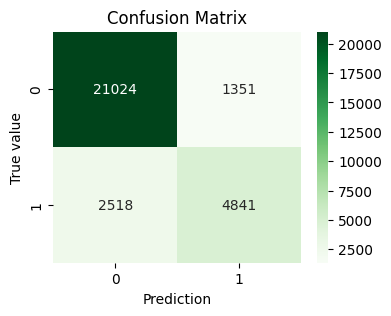

In [45]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.ylabel('True value')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

## Observations.
* The Random forest model also has the same accuracy of about 87% almost same as the Logistic regression. I optimize the hyperparameter below. 

## Hyper parameter tuning
The hyperparameters considered for tuning are
* n_estimators
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Again, f1-score is used for scoring.

In [40]:
params = {
    'classifier__n_estimators': [100, 200, 300],   
    'classifier__max_depth': [5, 10, None],          
    'classifier__min_samples_split': [2, 5, 10],          
    'classifier__min_samples_leaf': [1, 2, 4],        
    'classifier__max_features': ['sqrt', 'log2']  
}

rf_cv = GridSearchCV(estimator=rf_pipe, 
                     param_grid=params,
                     cv=5, 
                     scoring='f1')

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['income',
                                                                          'loan_amount',
                                                                          'dtir1',
                                                                          'LTV',
                                                                          'property_value']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(han...
                                                                          'co-applicant_credit_type',
                                                                          'Region'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_depth=10,
                                                               random_state=32))]),
             param_grid={'classifier__max_depth': [5, 10, None],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='f1')

In [41]:
print("Best Parameters: ", rf_cv.best_params_)
print("Best f1 Score: ", rf_cv.best_score_)

Best Parameters:  {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best f1 Score:  0.7375981166982257


In [42]:
y_pred = rf_cv.best_estimator_.predict(X_test)
y_prob = rf_cv.best_estimator_.predict_proba(X_test)[:, 1]


# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score: ", roc_auc_score(y_test, y_prob))


Accuracy:  0.8868635232393892

Confusion Matrix:
 [[21536   839]
 [ 2525  4834]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     22375
           1       0.85      0.66      0.74      7359

    accuracy                           0.89     29734
   macro avg       0.87      0.81      0.83     29734
weighted avg       0.88      0.89      0.88     29734


ROC-AUC Score:  0.881512098209846


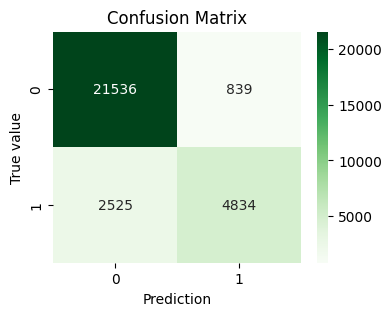

In [43]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.ylabel('True value')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

## Observations
* The best estimator here has
* max_depth: None,
* max_features selected by 'sqrt' method
* min_samples_leaf: 1
* min_samples_split: 10
* n_estimators: 300

Best f1 Score:  0.7375981166982257

* The Random forest has lower precision than the Logistic regression but has better recall and f1-scores.
* The ROC-AUC score is similar to the Logistic Regression.
* We can choose this model, but for only little improvement we sacrifice the interpretability of the model compared to Logistic regression.

# Adaboost Classifier

Here, as the third model, I consider Adaboost with Decision tree as the base estimator.

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier= DecisionTreeClassifier(max_depth=3)

ada_pipe = Pipeline(steps=[
    ('preprocessing', final_transformer),
    ('classifier', AdaBoostClassifier(estimator=base_classifier))
])

ada_pipe.fit(X_train, y_train)

y_pred = ada_pipe.predict(X_test)

y_proba = ada_pipe.predict_proba(X_test)[:, 1]
# Evaluation
print(f"Accuracy: {ada_pipe.score(X_test, y_test)}\n")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba)}")

Accuracy: 0.8916055693818524

Confusion Matrix : 
 [[21979   396]
 [ 2827  4532]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     22375
           1       0.92      0.62      0.74      7359

    accuracy                           0.89     29734
   macro avg       0.90      0.80      0.83     29734
weighted avg       0.89      0.89      0.88     29734

ROC-AUC Score: 0.8801641709577677


In [55]:
param_grid = {'classifier__learning_rate': [0.1*(n+1) for n in range(10)],
              'classifier__n_estimators' : [2*n+1 for n in range(10)],
              'classifier__estimator__max_depth' : [1, 2, 3, 4, 5]
             }                

ada_cv = GridSearchCV(estimator=ada_pipe, 
                     param_grid=param_grid,
                     cv=5, 
                     scoring='f1')

ada_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['income',
                                                                          'loan_amount',
                                                                          'dtir1',
                                                                          'LTV',
                                                                          'property_value']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(ha...
                                                                          'co-applicant_credit_type',
                                                                          'Region'])])),
                                       ('classifier',
                                        AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3)))]),
             param_grid={'classifier__estimator__max_depth': [1, 2, 3, 4, 5],
                         'classifier__learning_rate': [0.1, 0.2,
                                                       0.30000000000000004, 0.4,
                                                       0.5, 0.6000000000000001,
                                                       0.7000000000000001, 0.8,
                                                       0.9, 1.0],
                         'classifier__n_estimators': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19]},
             scoring='f1')

In [58]:
print("Best Parameters: ", ada_cv.best_params_)
print("Best f1 Score: ", ada_cv.best_score_)

Best Parameters:  {'classifier__estimator__max_depth': 4, 'classifier__learning_rate': 1.0, 'classifier__n_estimators': 19}
Best f1 Score:  0.7366900250011147


In [59]:
y_pred = ada_cv.best_estimator_.predict(X_test)
y_prob = ada_cv.best_estimator_.predict_proba(X_test)[:, 1]


# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score: ", roc_auc_score(y_test, y_prob))


Accuracy:  0.8889823098136813

Confusion Matrix:
 [[21961   414]
 [ 2887  4472]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     22375
           1       0.92      0.61      0.73      7359

    accuracy                           0.89     29734
   macro avg       0.90      0.79      0.83     29734
weighted avg       0.89      0.89      0.88     29734


ROC-AUC Score:  0.8753046844930502


The Best Parameters:  
* The base estimator decision tree's max_depth': 4,
* learning_rate': 1.0,
* n_estimators': 19
Best f1 Score:  0.7366900250011147

* Adaboost improves over Random forest accuracy and precision.
* This model has the highest f1 and ROC-AUC scores with better predictability.

# Which model do I choose?
Here, the problem considers loan defaults. Here model interpretability is very important. Given the scores of all the three models trained here, I would choose the simplest logistic regression model which did almost (may be little less) as good as other two. This is because, it is simple, easy to understand and moreover the model is linear and interpreting the model is very easy. 

As a bank, they would like to know what factors affect the most for a given costomer to default.

## Further steps to improve model
* I can include more features.
* Since the target has unbalanced classes, we can do oversampling or undersampling.
* We can use a different model like SVM, which may perform better.  

In [113]:
!jupyter nbconvert Loan_Default.ipynb --to webpdf --theme=light --no-input

[NbConvertApp] Converting notebook Loan_Default.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 3096983 bytes to Loan_Default.pdf
